# Сборный проект 

Цель исследования: Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Дано: Данные по продажам игр за 2016 год.

Необходимо: провести полны цикл анализа данных: 
1) Предобработку 
2) Исследовательский анализ
3) Составить портрет пользователя каждого региона
4) Проверить гипотезы
5) Написать общий вывод

Описание данных: 
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Оther_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as st

In [2]:
# Указываем базовые настройки 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set()

In [3]:
# Указываем путь к файлу
try:
    data_raw = pd.read_csv('/datasets/games.csv')
except: 
    data_raw = pd.read_csv('C:/Users/Boris/datasets/games.csv')

После указания пути выводим информацию по набору данных

In [4]:
# Выводим информацию о наборе данных
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Смотрим описание данных, на случай если есть отрицательные значения
data_raw.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


                                                 Матрица распределений                                                  


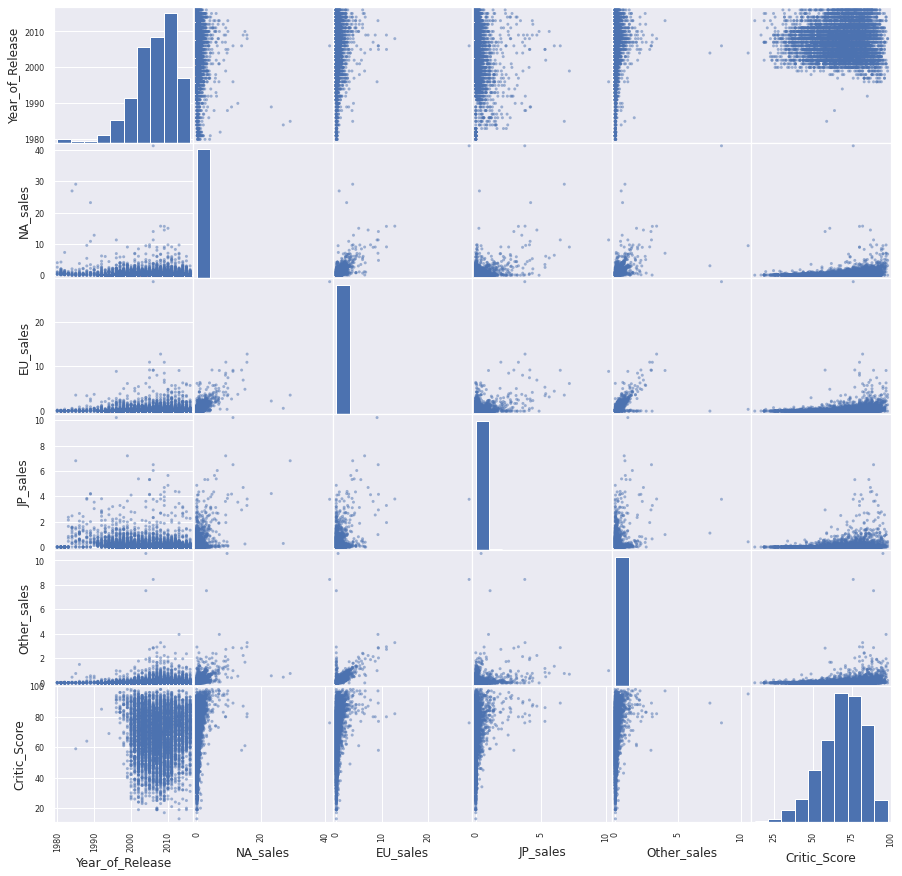

In [6]:
print('Матрица распределений'.center(120))
pd.plotting.scatter_matrix(data_raw, figsize=(15, 15))
plt.show()

In [7]:
data_raw.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


Перед нами данные, который включают в себя названия игр, год выпуска, платформу для игр, оценки критиков и пользователей, а также общее колличество продаж. 

## Предварительная обработка данных

In [8]:
# Создаем набор данных с которым будем работать
data = data_raw

Из информации, полученной выше, видим, что в названии столбцов присутствует верхний регистр, по правилам оформления pep8 этого лучше избегать, поэтому приведем все названия столбцов к нижнему регистру:

In [9]:
# Делаем это через функцию .str.lower()
data.columns = data_raw.columns.str.lower()

Помимо этого, приведем к нижнему регистру сразу и данные в столбцах, чтобы лечге было ориентироваться:

In [10]:
for column in data[['platform', 'genre', 'name', 'rating']]:
    data[column] = data[column].str.lower()

In [11]:
# Проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Как видим, у нас все получилось, далее выводим саму таблицу данных (первые 10 строк) для более близкого ознакомления 

In [12]:
# Выводим первые 10 строк
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.00,sports,41.36,28.96,3.77,8.45,76.00,8,e
1,super mario bros.,nes,1985.00,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.00,racing,15.68,12.76,3.79,3.29,82.00,8.3,e
3,wii sports resort,wii,2009.00,sports,15.61,10.93,3.28,2.95,80.00,8,e
4,pokemon red/pokemon blue,gb,1996.00,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.00,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006.00,platform,11.28,9.14,6.50,2.88,89.00,8.5,e
7,wii play,wii,2006.00,misc,13.96,9.18,2.93,2.84,58.00,6.6,e
8,new super mario bros. wii,wii,2009.00,platform,14.44,6.94,4.70,2.24,87.00,8.4,e
9,duck hunt,nes,1984.00,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Из самой таблицы видим, что огромное колличество данных пропущено в столбцах **critical_score**, **user_score**, **rating**, помимо этого, есть пропущенные данные в столбцах **name**, **year_of_release**, **genre**. 

Также, можно поменять тип данных в столбце **year_of_release** и **user_score**, где по какой-то причине, численное значение указано в формате ***object***. 

Начнем работу по предобработке данных с выявления пропущенных значений. Для этого начнем рассматривать каждый столбец по отдельности:

In [13]:
# Делаем подстчет колличества пропусков в данных в этом столдце
data['name'].isna().sum()

2

In [14]:
# Вывовим строки с пропущенными данными в столце name
data[data_raw['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как мы видим, что эти данные почти пустые, они входят в 2 множества: колличество игр за 1993 год и игры на платформе *GEN*. Просмотрим сколько значений в этих множествах и скажется ли удаление этих строк на общую статистику:

In [15]:
# Считаем общее колличество игр на платформе gen
len(data[data['platform']=='gen'])

29

In [16]:
# Считаем обще колличество игра за 1993 год
len(data[data['year_of_release']==1993])

62

Как мы видим, особого влияния на статистические данные игры без названия не окажут, поэтому мы можем с чистой совестью удалить эти строки.  

In [17]:
# Удаляем строки с пропусками
data['name'] = data['name'].dropna()

In [18]:
# Делаем проверку
data['name'].isna().sum()

2

Почему-то не получается удалить данные пропуски, может ли быть что это такое название игры 'NaN'. Тем не менее, раз уже решили удалить их, то удалим. 

In [19]:
# Удаляем строки по индексам
data = data.drop(index=[659, 14244])

In [20]:
# Скрещиваем пальцы, делаем проверку
data['name'].isna().sum()

0

Будь то пропуск или игра с таким названием, так или иначе, с этими строками мы попращались. 

In [21]:
# Обновляем индексы после удаления строк
data = data.reindex()

In [22]:
# Снова выводим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Как мы видим наши манипуляции с теми строками дали результат, сразу в нескольких столбца стало меньше пропусков, на всякий случай мы это проверим:

In [23]:
# Проверяем информацию по пропускам для всего набора данных
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Отлично, с этими данными разобрались, идем дальше.

Приступаем к обработке пропусков в следующем столбце: **year_of_release**:

- Для начала проверим колличество игр в столбце **name**:

In [24]:
# Выводим колличество уникальных значений
data['name'].nunique()

11559

Колличество игр заметно ниже колличества строк, это связано прежде всего с тем, что многие игры портируются под различные устройства, а значит и имеют несколько строк с различным параметром в столбце - **platform**.

Тем не менее, на год выхода игры это не повлияет, поэтому мы может подставить значения из года выхода там, где это необходимо

In [25]:
# Делаем цикл, который будет добавлять год выпуска, если найдет название игры на других платформах 
for year_copy in data[data['year_of_release'].isna() == True].index:
    data['year_of_release'][year_copy] = data.loc[data['name'] == data['name'][year_copy], 'year_of_release'].max()

/tmp/ipykernel_121/3332274798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'][year_copy] = data.loc[data['name'] == data['name'][year_copy], 'year_of_release'].max()


In [26]:
# Проверяем данные
data['year_of_release'].isna().sum()

146

Нахождение игр на других площадках позволило нам сократить колличество пропусков, тем не менее 146 пропусков осталось, к сожалению, ничего сделать с ними мы не сможем. 

Нам известно что, в столбце оценки пользователя **user_score** имеются значения tbd. ***TBD*** - аббревиатура от английского ***To Be Determined*** (будет определено) или ***To Be Decided*** (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Поэтому, данные значения мы заменим на пропуски ***NaN***. 

In [27]:
# Поверяем длину списка со значением tbd
len(data.query('user_score == "tbd"')['user_score'])

2424

In [28]:
# Заменяем значения tbd через replace
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [29]:
# Смотрим результат
len(data.query('user_score == "tbd"')['user_score'])

0

Все строки со значением ***tbd*** заменены на пропуски.

Следующим этапом будет измененые формата данных в столбцах. Выведем данные перед обработкой:

In [30]:
# Выводим еще раз информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


Мы видим, что можно изменить тип данных в столбце **year_of_release** и столбце **user_score**, однако, чтобы поменять тип данных в стобце **year_of_release** для начала надо заменить все пропуски в данных на 0. Те же самые действия мы сделаем со столбцом **critical_score**, поскольку там целочисленные значения, за исключением пропущенных данных

In [31]:
# Делаем замену пропусков на 0
data['year_of_release'] = data['year_of_release'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(0)
# Меняем тип данных на целочисленные
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')
# Меняем тип данных
data['user_score'] = data['user_score'].astype('float')

In [32]:
# Делаем проверку 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 2.0+ MB


Проверим наличие дубликатов в данных:

In [33]:
# Делаем подсчет дубликатов в данных
data.duplicated().sum()

0

Дубликатов нет

Проведем проверку соотношения данных из первоначальных к уже обработанным, узнаем какой процент данных сохранился:

In [34]:
print('Процент сохранившихся данных:')
round(data['name'].count() / data_raw['name'].count() * 100)

Процент сохранившихся данных:


100

Осталось только создать столбец, в котором будет указано суммарное значение продаж:

In [35]:
# Считаем все продажи в регионах
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Краткий итог из первой части работы: 

- Была проведена предварительная обработка данных;
- Заполнены пропущенные значени, там где это было возможно;
- Изменены форматы данных в некоторых столбцах;
- Все данные были приведены к нижнему регистру;
- Были подсчитаны все продажи по регионам.

Можно приступать к следующему этапу работы.

## Исследовательский анализ данных

**Для проведения исследовательского анализа данных необходимо:**
- Посмотреть, сколько игр выпускалось в разные годы. Определить важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Определить за какой характерный срок появляются новые и исчезают старые платформы?
- Определить какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [36]:
# Для будущих подписей графиков сделаем словарь с названиями столбцов и их переводами
thesaurus = {
    'name':'Название игры',
    'platform':'Платформа',
    'year_of_release':'Год выпуска',
    'genre':'Жанр игры',
    'na_sales':'Продажи в Северной Америке',
    'eu_sales':'Продажи в Европе',
    'jp_sales':'Продажи в Японии',
    'other_sales':'Продажи в других странах',
    'critic_score':'Оценка критиков',
    'user_score':'Оценка пользователей',
    'rating':'Рейтинг',
    'total_sales':'Всего продано',
    'esrb':'Рейтинг ESRB'
}

In [37]:
# Создаем функцию, которая будет делать графики по заданным параметам
def bar_creator(groupby_column, func, y='name', title='Название'):
    '''Функция создания графиков'''
    try:  
        plt.style.use('seaborn-colorblind')
        sns.set_style('whitegrid')
        data_to_plt = data.groupby(groupby_column)[y]
        if func == 'count':
            data_to_plt_var = data_to_plt.count()
            figsize = (12, 5)
            plot = data_to_plt_var.plot(kind='bar',
                                        y=y,
                                        figsize=figsize,
                                        ec='black',
                                        label='_nolegend_')
            plt.axhline(y = data_to_plt_var.max(),
                        alpha=0.8,
                        color = 'red',
                        linestyle = ':',
                        gid = '1',
                        label=f'Максимальное значение = {data_to_plt_var.max():.0f}')
            plt.axhline(y=data_to_plt_var.median(),
                        alpha=0.8,
                        color='black',
                        linestyle=':',
                        label=f'Медианное значение = {data_to_plt_var.median():.0f}') 
            plt.title(title)
            plt.legend()
            plt.xticks(rotation = 65)
            plt.xlabel(thesaurus[groupby_column])
        elif func == 'sum':
            data_to_plt_var = data_to_plt.sum().sort_values()
            figsize = (12, 10)
            plot = data_to_plt_var.plot(kind='barh',
                                        y=y,
                                        figsize=figsize,
                                        ec='black',
                                        label='_nolegend_')
            plt.axvline(x=data_to_plt_var.max(),
                        alpha=0.8,
                        color='red',
                        linestyle=':',
                        gid='1',
                        label=f'Максимальное значение = {data_to_plt_var.max():.0f}')
            plt.axvline(x=data_to_plt_var.median(),
                        alpha=0.8,
                        color='black',
                        linestyle=':',
                        label=f'Медианное значение = {data_to_plt_var.median():.0f}')
            plt.title(title)
            plt.legend()
            plt.yticks(rotation = 25)
            plt.ylabel(thesaurus[groupby_column])
    except:
        print('Ошибка вывода графика!')

### Сколько игр выпускалось в различные периоды

При помощи функции **bar_creator** делаем подсчет колличества игр выходивших по годам

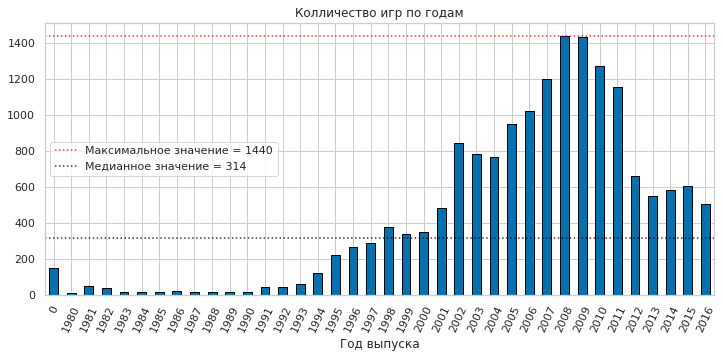

In [38]:
# Применяем функцию
bar_creator('year_of_release', 'count', title='Колличество игр по годам')

Заметный рост продаж игр начинается с 1994 года, скорее всего ввиду усоворшенствования компьютерных технологий, а также доступности комьютеров. В 2002 был резкий скачек. Лично я до сих пор считаю 2002 золотым годом геймдева, тогда вышли такие титаны индустрии как WarCraft III:Reign of Chaos, The Elder Scrolls 3: Morrowind, GTA: Vice City, Stronghold Crusader, Syberia, The Sims и многое многое другое. Поистине великолепный год для геймдева. Видимо этот год дал такой толчок для разватия, что аж вплоть до 2008 года был подъём,однако, дальше начался спуск. Это могло произойти из-за выхода различных платформ, развития мобильных устройств, а также перенасыщения рынка.

Для дальнейшего расчета можно использовать период с 1994 года по 2016 год включительно, хоть и с 1998 года колличество выпущенных игр и выше медианного значения, тем не менее, упущенные данные могут сильно повредить общей статистике.

### Колличество игр по платформам

Далее нам необходимо:
- посмотреть, как менялись продажи по платформам
- выберать платформы с наибольшими суммарными продажами и построить распределение по годам
- определить за какой характерный срок появляются новые и исчезают старые платформы 

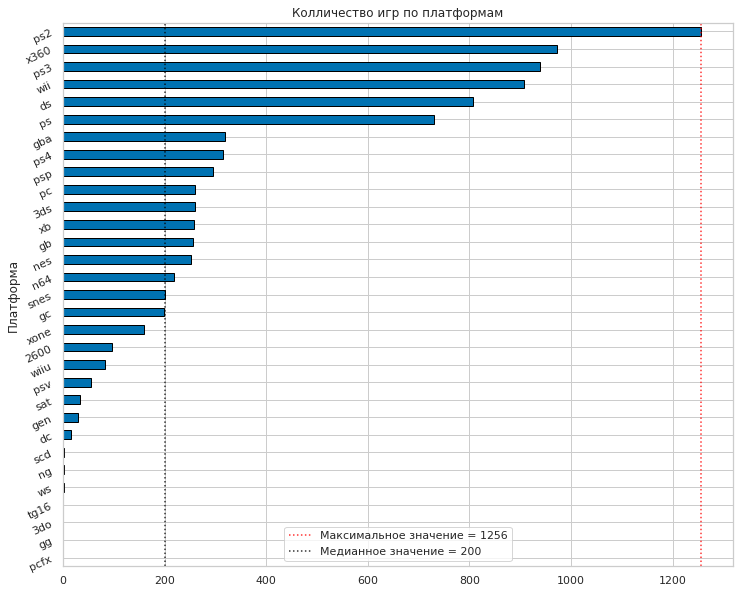

In [39]:
# Применяем функцию bar_creator для подсчета колличества продаж по платформам
bar_creator('platform', 'sum','total_sales', 'Колличество игр по платформам')

Больше всего было выпущено игр на ***ps2***, далее идет ***x360*** и замыкает тройку лидеров ***ps3***. Всего игровых платформ имеют значительный отрыв по продажам игр от остальных. Учитывая тройку лидеров приведенную выше, это ***wii*** - четвертое место, ***ds*** - пятое место, и ***ps*** на шестом месте. 

Эти шесть платформ мы и будем использовать для дальнейших вычислений, а также, по моему мнению необходимо к ним добавить **pc**, т.е. персональный компьютер. Также, необходимо добавить такую платформу как **ps4**, поскольку она только вышла и данные по ней только начинают формироваться.

Таким образом, по двум предыдущим графикам мы определились с параметрами дальнейшего исследования, нами будут использоваться года с 1994 по 2016 и 8 игровых платформ.

In [40]:
# Делаем срез по интересующим нас данным
data_interest = data.query('year_of_release >=1994 and platform == ["ps2","x360","ps3","wii","ds", "ps", "pc", "ps4"]')

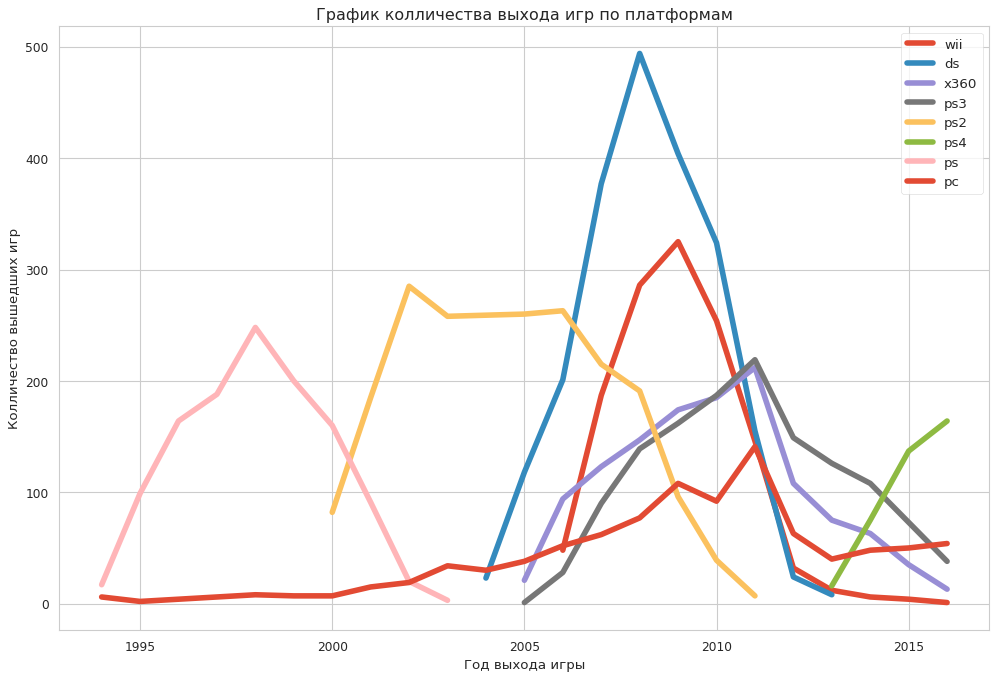

In [41]:
# Строим график колличества игр по платформам в зависимости от даты выхода
plt.figure(figsize=(15, 10), dpi=80)
plt.style.use('ggplot')
sns.set_style('whitegrid')

for i in data_interest['platform'].unique():
    plt.plot(data_interest.loc[data_interest['platform']==i].pivot_table(index='year_of_release',
                                                                         values='name',
                                                                         aggfunc='count'),
            label=i,
            linewidth=5)
    plt.legend(fontsize='large')
    
plt.xlabel('Год выхода игры')
plt.ylabel('Колличество вышедших игр')
plt.title('График колличества выхода игр по платформам')   
plt.show()

In [42]:
# Делаем подсчет между первым годом выхода игр и последним
for platform in data_interest['platform'].unique():
    year = data_interest[data_interest['platform']==platform]['year_of_release'].max() - \
        data_interest[data_interest['platform']==platform]['year_of_release'].min()
    print(f'Разница между годами выпуска игр на платформе - {platform}:\t {year}')

Разница между годами выпуска игр на платформе - wii:	 10
Разница между годами выпуска игр на платформе - ds:	 9
Разница между годами выпуска игр на платформе - x360:	 11
Разница между годами выпуска игр на платформе - ps3:	 11
Разница между годами выпуска игр на платформе - ps2:	 11
Разница между годами выпуска игр на платформе - ps4:	 3
Разница между годами выпуска игр на платформе - ps:	 9
Разница между годами выпуска игр на платформе - pc:	 22


Из данных видно, что в среднем платформа живет чуть более 10 лет, за исключением ПК. Также, можно увидеть, когда по годам были популярны платформы, в самом начале были популярны игры на PS, потом на PS2, далее вместе с развитием игродела стало большее колличество платформ, а соответственно и игр. Как мы помним начиная с 2008 года был резкий всплеск выпуска игр, графики выше это подтверждают и объясняют, ведь также сильно увеличилось колличество платформ для игр. 

Однако, после взлета - наступило падение, все платформы за исключением ПК стали сдавать свои позиции, кроме ps4, которая вышла недавно и только набирает обороты. 

По данным графикам можно сделать выводы, что: 
- Самой стабильной платформой для игр является ПК 
- В среднем платформы (за исключением ПК) живут чуть более 10 лет
- В настоящее время набирает популярность такая платформа как PS 4 и будет еще долго актуальна
- Пик продаж игр для различных платформ (за исключением ПК) наступает примерно через 5 лет после выпуска

Данные выводы будут актуальны и для 2017 года.

Использую данную информацию, давайте посмотрим график выхода игр начиная с 2011 года, чтобы на 2017 год платформы, на которых выходят эти игры были актуальны:

In [43]:
# Создаем набор данных в среде от 2011 года для столбца выхода игр
data_actual = data.query('year_of_release >=2011')

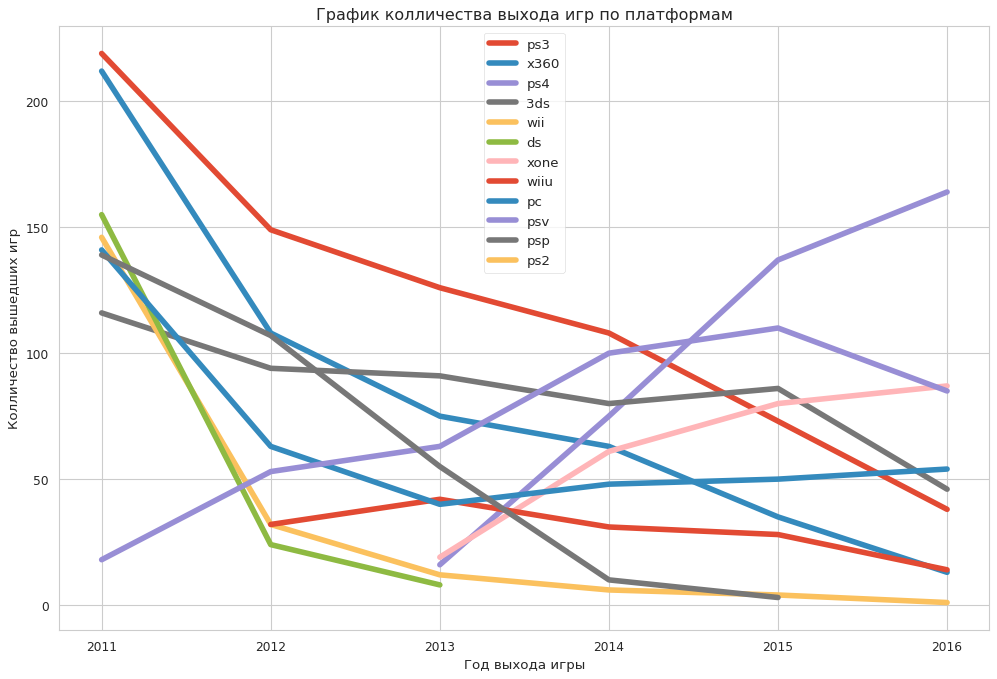

In [44]:
# Строим график по колличеству выхода игр по годам для всех платформ, начиная с 2011 года
plt.figure(figsize=(15, 10), dpi=80)
plt.style.use('ggplot')
sns.set_style('whitegrid')

for i in data_actual['platform'].unique():
    plt.plot(data_actual.loc[data_actual['platform']==i].pivot_table(index='year_of_release',
                                                                         values='name',
                                                                         aggfunc='count'),
            label=i,
            linewidth=5)
    plt.legend(fontsize='large')
    
plt.xlabel('Год выхода игры')
plt.ylabel('Колличество вышедших игр')
plt.title('График колличества выхода игр по платформам')   
plt.show()

Как мы видим, к актуальным платформам можно еще отнести **xone**, которая также появилась в 2013 году, но не вошла в 8 платформ, которые мы рассматривали. Однако, эта платформа также может оказаться актуальной. 

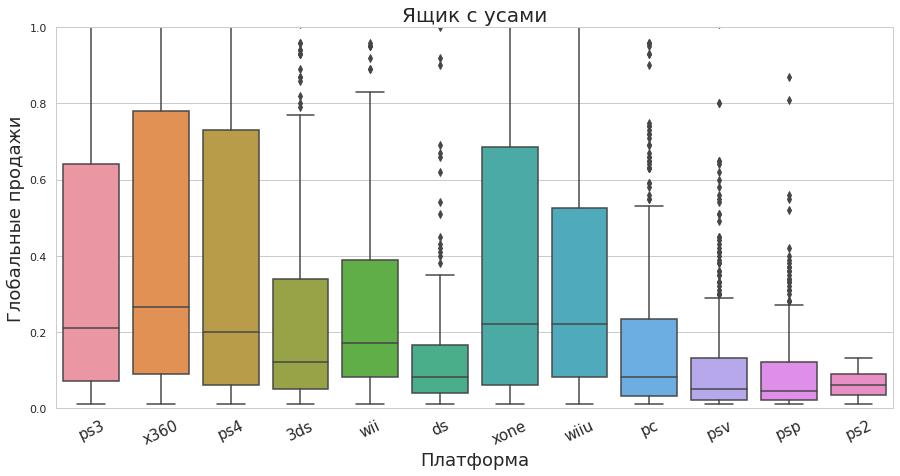

In [45]:
# Строим ящик с усами 
plt.figure(figsize=(15, 7))

sns.boxplot(data=data_actual, x='platform', y='total_sales')

plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Платформа', fontsize=18)
plt.ylabel('Глобальные продажи',fontsize=18)
plt.ylim(0, 1)
plt.xticks(rotation=25, fontsize=15)
plt.show()

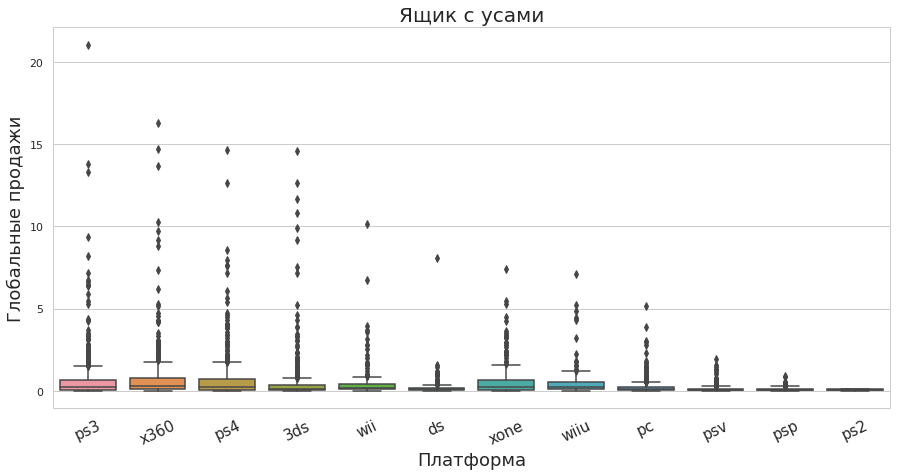

In [46]:
# Строим ящик с усами без лимитов, чтобы посмотреть выбросы
plt.figure(figsize=(15, 7))

sns.boxplot(data=data_actual, x='platform', y='total_sales')

plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Платформа', fontsize=18)
plt.ylabel('Глобальные продажи',fontsize=18)
plt.xticks(rotation=25, fontsize=15)
plt.show()

In [47]:
# Смотрим характеристику информации для интересующих нас платформ
data_actual.groupby('platform')['total_sales'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
ps3,713.00,0.63,1.45,0.01,0.07,0.21,0.64,21.05
3ds,513.00,0.50,1.44,0.01,0.05,0.12,0.34,14.60
x360,506.00,0.76,1.63,0.01,0.09,0.27,0.78,16.27
psv,429.00,0.13,0.21,0.01,0.02,0.05,0.13,1.96
pc,396.00,0.25,0.50,0.01,0.03,0.08,0.23,5.14
ps4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
psp,314.00,0.09,0.12,0.01,0.02,0.04,0.12,0.87
xone,247.00,0.65,1.04,0.01,0.06,0.22,0.69,7.39
wii,201.00,0.48,1.05,0.01,0.08,0.17,0.39,10.12


Итак, мы посмотрили "Ящик с усами" для интересующих нас платформ по продажам, стоит сразу учесть что мы ограничил его 1 миллионом продаж, иначе из-за выбросов график сильно смещался вверх. 

Также, мы вывели информацию о продажах, тройка лидеров по общим продажам не изменилась. Однако, есть интересные данные для платформы **wii**, где в один год было продано максимальное колличество игр, превышающее 82 миллиона. Тем не менее, попасть в тройку лидеров по продажам это не помогло.

По ящику с усами видно, что с 2011 года для ps2 стало меньше продаж, поскольку платформа начала терять свою актуальность, а вот ps3 наоборот находится на пике.

### Определение зависимостей

Далее нам необходимо построить корреляцию для интересующих нас данных, также, по заданию необходимо выбрать одну платформу. В данном задании мы пойдем методом ***дедукции***, для начала посмотрим все значения корреляций, а далее выберем одну платформу с наибольшей зависимостью.

In [48]:
# Делаем дообработку данных для корректного отображения
data_interest = data_interest.dropna()
data_interest = data_interest.query('user_score != 0')
data_interest = data_interest.query('critic_score != 0')
data_interest = data_interest.query('total_sales != 0')

In [49]:
# Создаем функцию построения графиков корреляции и нахождения значений корреляции для оценки критиков, пользователей и всех продаж 
def scatter_creator(platform):
    '''Функция построеня графиков корреляции'''
    data_use = data_interest[data_interest['platform']==platform]
    plt.figure(figsize=(5, 3))
    plt.style.use('seaborn-colorblind')
    sns.set_style('whitegrid')
    
    sns.scatterplot(data=data_use,
                    x='critic_score',
                    y='total_sales',
                    label='Критики')
    
    plt.xlabel('Оценка')
    plt.ylabel('Всего продаж')
    plt.legend(loc=9)
    plt.title(f'Корреляция для платформы {platform}')
    
    plt.figure(figsize=(5, 3))
    plt.style.use('seaborn-colorblind')
    sns.set_style('whitegrid')
    
    sns.scatterplot(data=data_use,
                    x='user_score',
                    y='total_sales',
                    label='Пользователи')
    
    plt.xlabel('Оценка')
    plt.ylabel('Всего продаж')
    plt.legend(loc=9)
    plt.title(f'Корреляция для платформы {platform}')
    plt.show()
    
    print(f'Корреляция продаж с оценкой критиков для платформы {platform}: ', '\t', data_use['total_sales'].corr(data_use['critic_score']))
    print(f'Корреляция продаж с оценкой пользователей для платформы {platform}: ', '\t', data_use['total_sales'].corr(data_use['user_score']))
    print('____'*21)

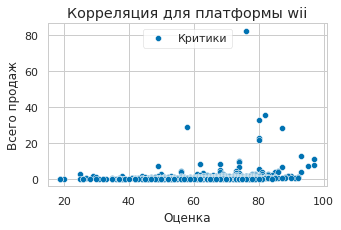

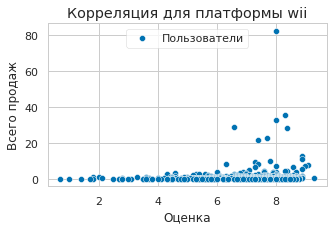

Корреляция продаж с оценкой критиков для платформы wii:  	 0.17068585162862096
Корреляция продаж с оценкой пользователей для платформы wii:  	 0.11176795733913143
____________________________________________________________________________________


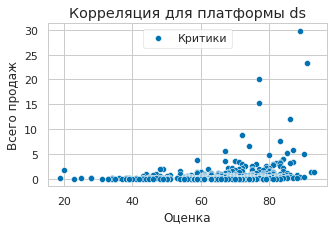

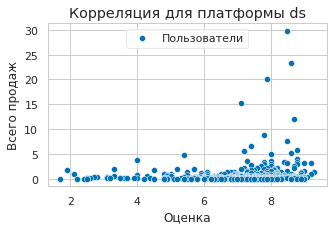

Корреляция продаж с оценкой критиков для платформы ds:  	 0.2312979462027649
Корреляция продаж с оценкой пользователей для платформы ds:  	 0.1394814799629335
____________________________________________________________________________________


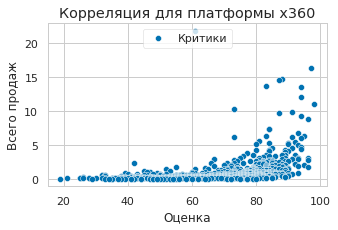

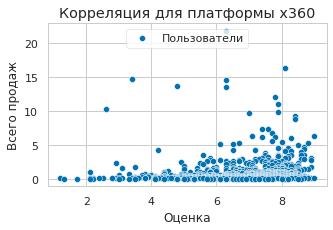

Корреляция продаж с оценкой критиков для платформы x360:  	 0.38932269822184057
Корреляция продаж с оценкой пользователей для платформы x360:  	 0.11124126279170192
____________________________________________________________________________________


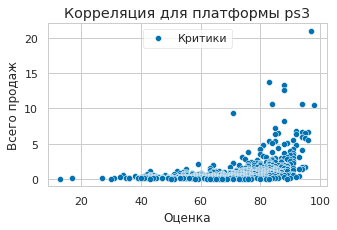

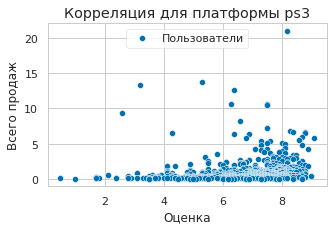

Корреляция продаж с оценкой критиков для платформы ps3:  	 0.426979256389542
Корреляция продаж с оценкой пользователей для платформы ps3:  	 0.14477605291393042
____________________________________________________________________________________


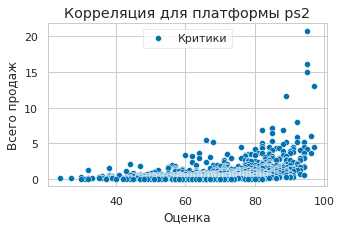

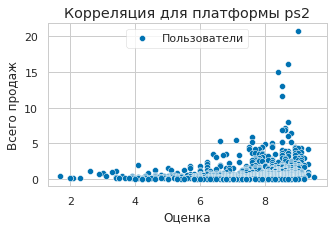

Корреляция продаж с оценкой критиков для платформы ps2:  	 0.3893724907641917
Корреляция продаж с оценкой пользователей для платформы ps2:  	 0.17032086855862874
____________________________________________________________________________________


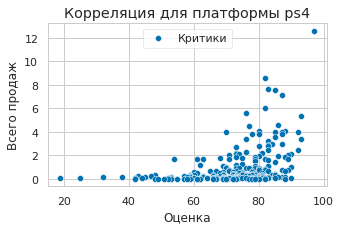

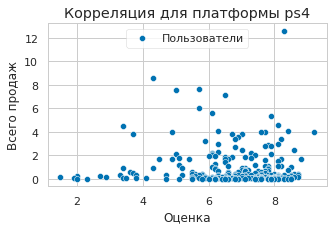

Корреляция продаж с оценкой критиков для платформы ps4:  	 0.40357291073577817
Корреляция продаж с оценкой пользователей для платформы ps4:  	 -0.03088781296873357
____________________________________________________________________________________


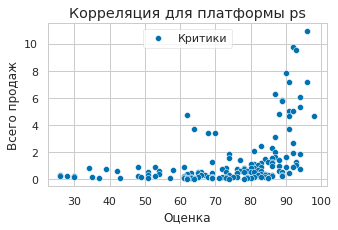

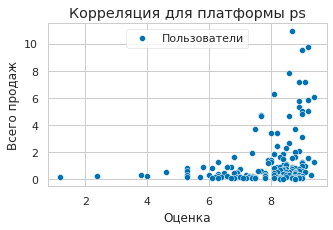

Корреляция продаж с оценкой критиков для платформы ps:  	 0.43762204591578213
Корреляция продаж с оценкой пользователей для платформы ps:  	 0.3029438215546098
____________________________________________________________________________________


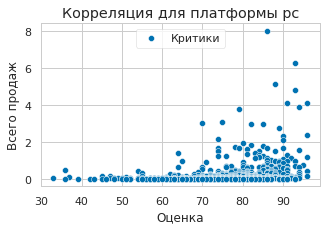

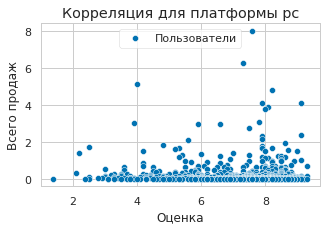

Корреляция продаж с оценкой критиков для платформы pc:  	 0.25530558395293307
Корреляция продаж с оценкой пользователей для платформы pc:  	 -0.0031458968829067785
____________________________________________________________________________________


In [50]:
# Применяем функцию в цикле для всех интересующих нас платформ
for platform in data_interest['platform'].unique():
    scatter_creator(platform)

In [51]:
# Смотрим матрицу корреляций для всех интересующих нас платформ
data_interest[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.00,0.25,0.10
critic_score,0.25,1.00,0.58
user_score,0.10,0.58,1.00


Как мы видим, корреляция не сильно высокая, в среднем, она составляет ***0.25*** для оценки критиков и ***0.1*** для оценки пользователей. 

Тем не менее, мы нашли платформу с наибольшей зависимостью продаж от оценк - **ps3**. Это может быть связано с тем, что платформа довольно дорогая, и когда она только вышла, многие смотрели на оценки критиков и пользователей, как подспорье в принятии решения о её покупке. 

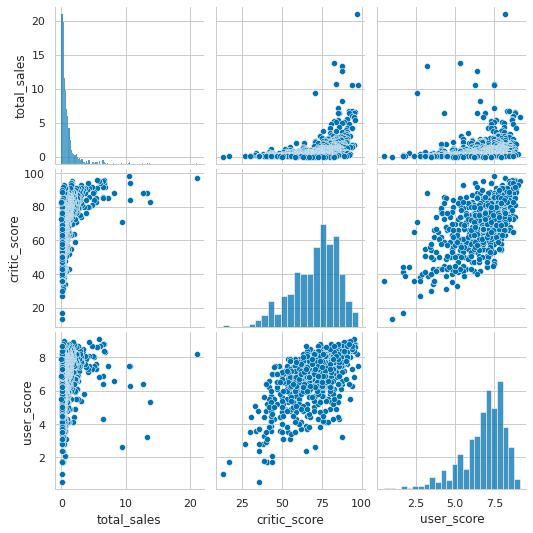

In [52]:
# строим pairplot для платформы PS3
sns.pairplot(data_interest[data_interest['platform']=='ps3'][['total_sales', 'critic_score', 'user_score']])

In [53]:
# Смотрим матрицу корреляций для платформы PS3
data_interest[data_interest['platform']=='ps3'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.00,0.43,0.14
critic_score,0.43,1.00,0.63
user_score,0.14,0.63,1.00


Как мы видим, наибольшая зависимость между оценкой критиков и всеми продажами составляет ***0.43***, в то же время корреляция между оценкой пользователей и продажи состаляет ***0.14***.

Таким образом, суммируя всю информацию по корреляции можно сказать, что зависимость для большинства игр по продажам и оценками пользователей и критиков практически отсутствует. Она есть только для отдельно взятых игр. Вполне возможно, что это связано с тем, что многие жанровые или инди игры не подходят для шикорой массы пользователей, но имеют высокие оценки. В то же время как игры для широкой массы имеют средние оценки, изменяющиеся от патча к патчу, но тем не менее данные игры приносят основную массу продаж. 

Стоит также учесть, что корреляция между оценками пользователей и оценками критиков средняя, и для общего колличества интересующих нас платформ составляет ***0.58***.

### Колличество проданных игр по жанрам

Необходмо посмотреть на общее распределение игр по жанрам .

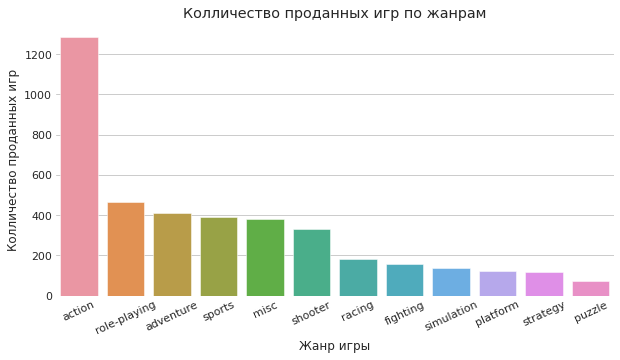

In [82]:
# Посмотрим колличество проданных игр по жанрам 
genre = data_actual.groupby('genre')['name'].count().reset_index().sort_values('name', ascending=False)

plt.figure(figsize=(10, 5))
plt.style.use('seaborn-dark')
sns.set_style('whitegrid')

sns.barplot(data=genre, x='genre', y='name')

plt.xlabel('Жанр игры')
plt.ylabel('Колличество проданных игр')
plt.xticks(rotation=25)
plt.title('Колличество проданных игр по жанрам')
plt.show()

По графику видно, что наиболее популярным жанром является ***action***, далее идут ***sport*** и ***shooter***. Также, мы видим группу не особо популярных жанров: ***fighting, simulation, puzzle, adventure, strategy***. Это подтверждает гипотезу высказаную в предыдущем пункте, что не популярные жанры, могут быть с высокими оценками, но не приносить прибыль. 

Далее мы рассмотрим колличество проданных игры с прибылью от них:

In [83]:
# Делаем сводную таблицу по интересующим нас данным
genre_total = data_actual.pivot_table(index='genre',
                                        values='total_sales',
                                        aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
# Объединяем таблицы по колличеству и общей сумме продаж
genre_plot = genre.merge(genre_total, on='genre')

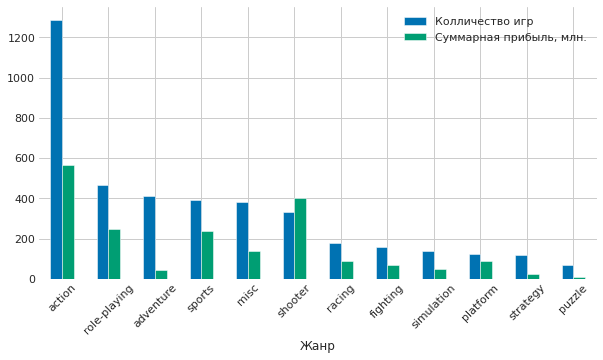

In [84]:
# Выодим график по таблице
ax = plt.gca()

genre_plot.plot(kind='bar',x='genre',figsize=(10,5), ax=ax)

ax.legend(['Колличество игр', 'Суммарная прибыль, млн.'])
plt.xticks(rotation=45)
plt.xlabel('Жанр')
plt.show()

Далее посмотрим данные по медианным и средним значениям продаж. 

In [97]:
# Делаем набор данных по актуальной информации
data_plot = data_actual.groupby('genre')['total_sales'].agg(['median','mean']).sort_values(by='median', ascending=False)

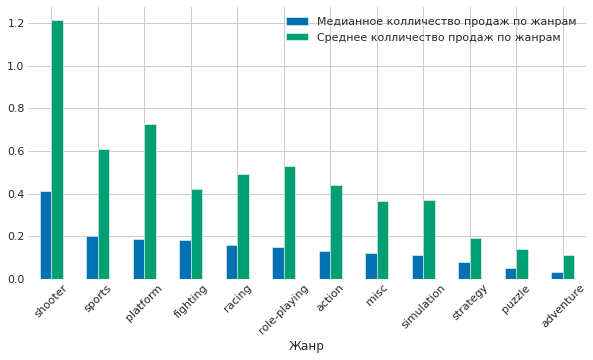

In [98]:
# Выодим график по таблице
ax = plt.gca()

data_plot.plot(kind='bar',figsize=(10,5), ax=ax)

ax.legend(['Медианное колличество продаж по жанрам', 'Среднее колличество продаж по жанрам'])
plt.xticks(rotation=45)
plt.xlabel('Жанр')
plt.show()

Мы посчитали колличество проданых игр и полученных от них общей прибыли. Важно сразу указать, что прибыль исчисляется миллионами, а поэтому корректно её сравнивать только между собой. Однако, можно заметить, что больше всего приносят такие жанры как ***action, sports, shooter***. Также, такой жанр как ***adventure*** приносит мало прибыли, но выпускается большое колличество игр. Это может быть обусловлено популярностью жанра у инди разработчиков, которые выпускают большое колличество игр на узкую аудиторию. 

По медианным данным продаж мы видим, что наиболее популярным жанорм является **shooter**, далее идут **sports** и **platform**, а самыми не популярными **strategy**, **puzzle** и **adventure**. 

## Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP и других регионах):
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [57]:
# Делаем вспомогательный словарь
thesaurus_sales = {
    'eu_sales': {
        'translate':'Продажи в Европе',
        'color':'lightblue'
    },
    'na_sales': {
        'translate':'Продажи в Северной Америке',
        'color':'red'
    },
    'jp_sales': {
        'translate':'Продажи в Японии',
        'color':'green'
    },
    'other_sales': {
        'translate':'Продажи в других регионах',
        'color':'black'
    }
}

In [58]:
# Создаем функцию
def regional_info(groupby, region, ax):
    '''Функция создания графиков по регионам'''
    data_func = data.groupby(groupby)[region].sum().sort_values(ascending=False).head(5)
    info_plot = data_func.plot(kind='bar', 
                               ax=axes[ax],
                               color=thesaurus_sales[region]['color'],
                               title=thesaurus_sales[region]['translate'],
                               alpha=0.8,
                               fontsize=20,
                               rot=10)
    info_plot.title.set_size(25)
    info_plot.set_xlabel(f'Топ 5 в разделе - {thesaurus[groupby]}', fontsize=18)

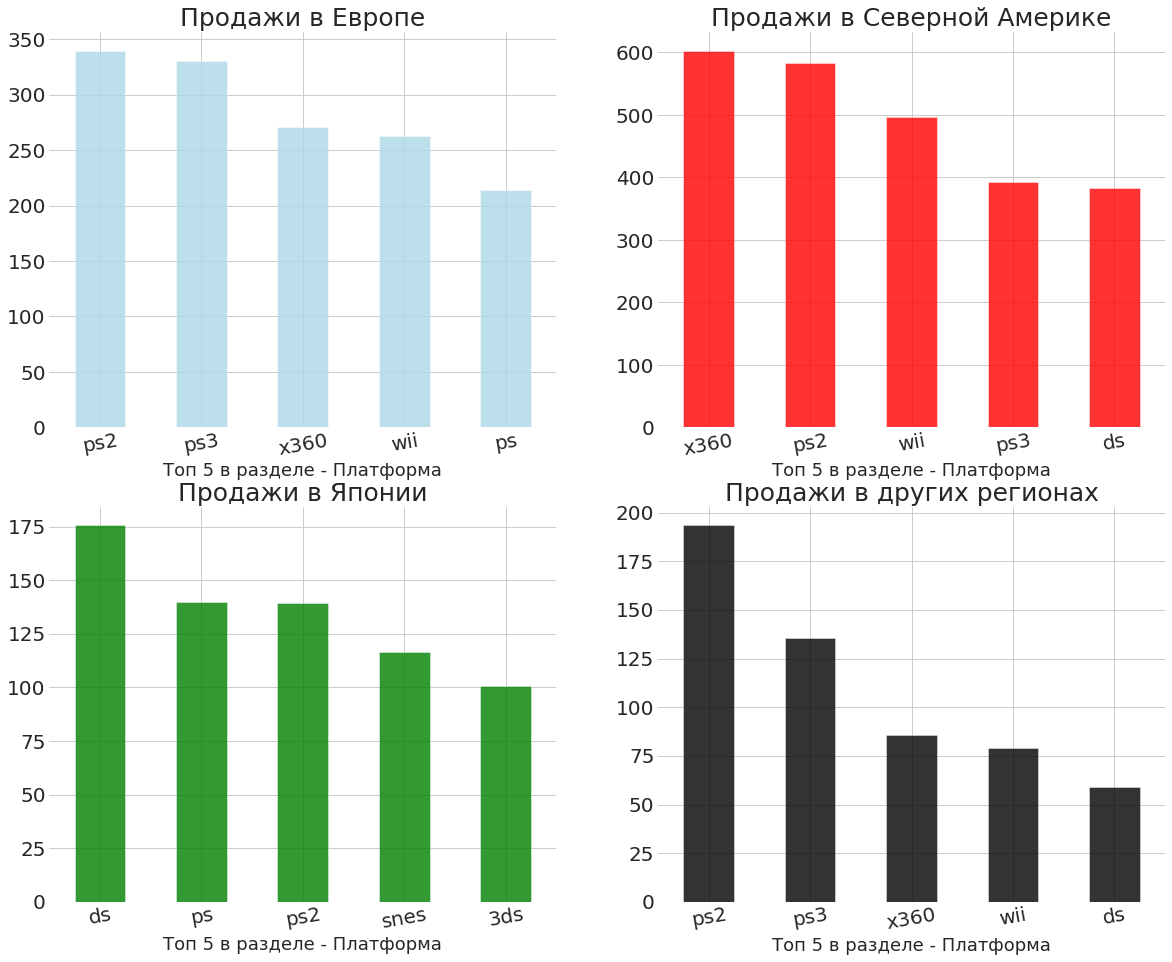

In [59]:
# устанавливаем параметр subplots
fig, axes = plt.subplots(2,2, figsize=(20,16))
# применяем функцию
regional_info('platform','eu_sales',(0,0))
regional_info('platform','na_sales',(0,1))
regional_info('platform','jp_sales',(1,0))
regional_info('platform','other_sales',(1,1))

Как мы видим, есть некоторые отличия по популярности различных игровых платформ в различных регионах. Для европейского регина характерно использование ps2 и с небольшим отстованием ps3 как основных игровых платформ. В Северной Америке, наибольшей популярностью пользуется x360. В Японии самой популярной платформой является ds. Для остальных регионов, наибольшей интерес представляет ps2. 

Можно заметить, что наиболее популярными платформами в Америке и Японии являются платформы, выпускаемые в этих регионах. 

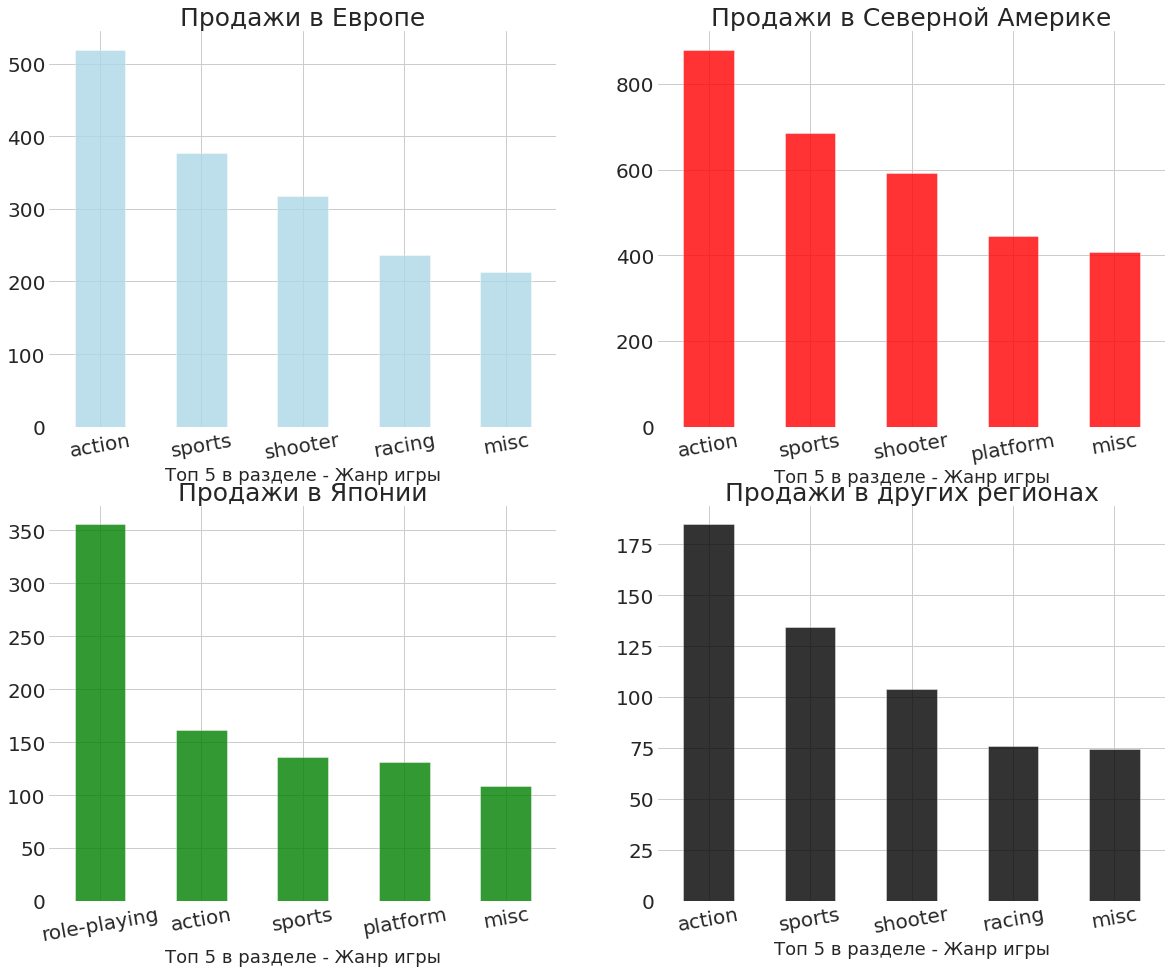

In [60]:
# устанавливаем параметр subplots
fig, axes = plt.subplots(2,2, figsize=(20,16))
# применяем функцию
regional_info('genre','eu_sales',(0,0))
regional_info('genre','na_sales',(0,1))
regional_info('genre','jp_sales',(1,0))
regional_info('genre','other_sales',(1,1))

По наиболее популярным жанрам тоже есть отличия: в Японии наиболее популярен жанр ролевых игр, в отличие от других регионов, где популярны экшены. Также, есть различия в местах в рейтинге по популярности. Скорее всего эти различия можно объяснить региональными игровыми традициями. 

In [61]:
# Делаем вспомогательный словарь
thesaurus_esrb = {
    'eс':'6+',
    'k-a':'Для детей',
    't':'13+',
    'm':'17+',
    'ao':'18+',
    'e':'Для всех',
    'nan':'Без рейтинга',
    'e10+':'10+',
    'rp':'Неопределён'
}

In [62]:
# Делаем дополнительный столбец в данных для более понятного рейтинга
data['esrb'] = data['rating'].map(thesaurus_esrb)

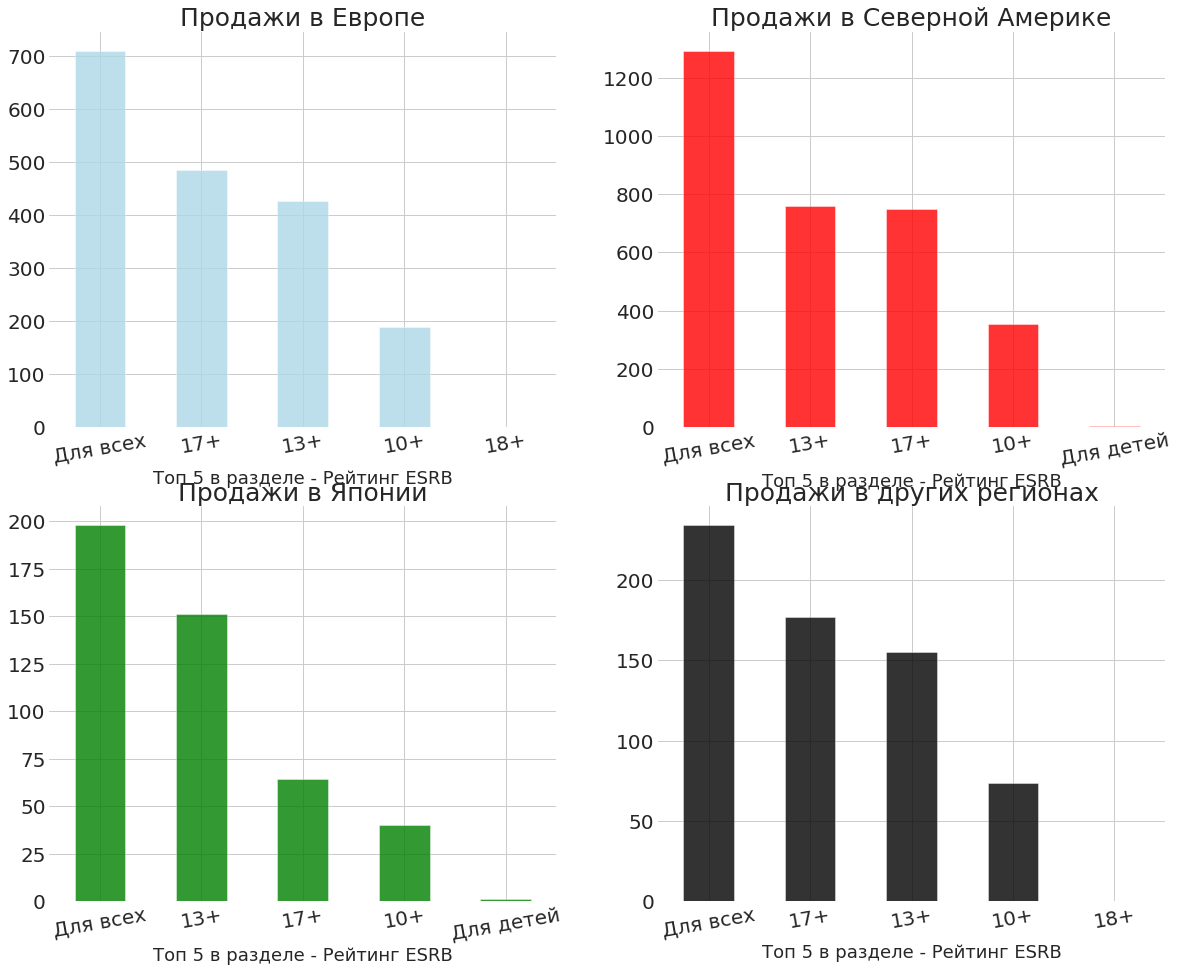

In [63]:
# устанавливаем параметр subplots
fig, axes = plt.subplots(2,2, figsize=(20,16))
# применяем функцию
regional_info('esrb','eu_sales',(0,0))
regional_info('esrb','na_sales',(0,1))
regional_info('esrb','jp_sales',(1,0))
regional_info('esrb','other_sales',(1,1))

Для продаж игр по рейтингу картина довольно одинаковая, самой популярной категорией является - Для всех. Дальше есть некоторые смещения, например в Японии и Америке более популярный рейтинг 13+, а для Европы и других регионов - 17+. 

## Проверка гипотез

Необходимо сформулировать и проверить следующие гипотезы:
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Для начала зададим параметр допуска alpha, в статистике принято задавать значение 0.01 - строгое, и 0.05 менее строгое допущение, мы будет использовать 0.05.

In [64]:
# Задаем параметр допуска
alpha = 0.05

### Гипотеза №1

**Нулевая гипотеза:** средние пользовательские рейтинги платформ *xone* и *pc* одинаковые:

$$\textbf{H₀}: рейтинг\;\textbf{xone}\;= \;рейтинг\;\textbf{pc}$$

**Алтернативная гипотеза:** средние пользовательские рейтинги платформ *xone* и *pc* не равны:

$$\textbf{H₀}: рейтинг\;\textbf{xone}\;≠ \;рейтинг\;\textbf{pc}$$

In [75]:
# Задаем две переменные, убираем у них пропущенные значения, чтобы избежать неточности
first_value = data_actual.query('platform == "xone"')['user_score'].dropna()
second_value = data_actual.query('platform == "pc"')['user_score'].dropna()

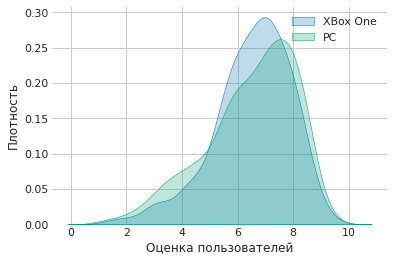

In [76]:
sns.kdeplot(first_value, fill=True, label='XBox One')
sns.kdeplot(second_value, fill=True, label='PC')

plt.xlabel('Оценка пользователей')
plt.ylabel('Плотность')
plt.legend()
plt.show()

In [77]:
# Проводим тестирование 
result = st.ttest_ind(first_value,
                      second_value, 
                      equal_var=True, 
                      alternative='two-sided')
# Выводим значение p-value
print('p-значение = ', result.pvalue)
# Делаем сравнение p-value с параметром допуска
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу H₀')
else:
    print('Не удалось отвергнуть нулевую гипотезу H₀')

p-значение =  0.6981816747159801
Не удалось отвергнуть нулевую гипотезу H₀


По результатам тестирования мы видим, что гипотезу о равенстве рейтингов xone и pc отвергать нельзя. Это же видно на графике плотности. 

### Гипотеза №2

**Нулевая гипотеза:** средние пользовательские рейтинги жанров *action* и *sports* равны:

$$\textbf{H₀}: рейтинг\;жанра\;\textbf{action}\;= \;рейтинг\;жанра\;\textbf{sports}$$

**Алтернативная гипотеза:** средние пользовательские рейтинги платформ *action* и *sports* не равны:

$$\textbf{H₀}: рейтинг\;жанра\;\textbf{action}\;≠ \;рейтинг\;жанра\;\textbf{sports}$$

In [78]:
first_value = data_actual.query('genre =="action"')['user_score'].dropna()
second_value = data_actual.query('genre =="sports"')['user_score'].dropna()

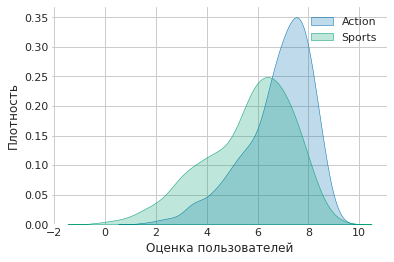

In [79]:
sns.kdeplot(first_value, fill=True, label='Action')
sns.kdeplot(second_value, fill=True, label='Sports')

plt.xlabel('Оценка пользователей')
plt.ylabel('Плотность')
plt.legend()
plt.show()

In [80]:
# Проводим тестирование 
result = st.ttest_ind(first_value,
                      second_value, 
                      equal_var=True, 
                      alternative='two-sided')
# Выводим значение p-value
print('p-значение = ', result.pvalue)
# Делаем сравнение p-value с параметром допуска
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу H₀')
else:
    print('Не удалось отвергнуть нулевую гипотезу H₀')

p-значение =  1.5514153759287005e-24
Отвергаем нулевую гипотезу H₀


По результатам т-тестирования мы отвергаем нулевую гипотезу.  

## Общий вывод

**Была проведена предварительная обработка данных:**

- Все данные приведены к нижнему регистру:
- Обработаны пропуски;
- Обработаны строки со значением TBD;
- Изменены типы данных в столбцах, где это было необходимо;
- Данные проверены на наличие дубликатов, которых не оказалось;
- Посчитали общее колличество продаж во всех регионах.

**Был проведен исследовательский анализ данных:**
1) Сколько игр выпускалось в различные периоды

Мы вычислили, что заметный рост числа продаж игр начался с 1994 года, что скорее всего было обусловлено усовершенствованием технологий ЭВМ и их доступностью для широкого пользователя. Рост продолжался вплоть дл 2008 года, где на пике было выпущено около 1400 игр. Однако, далее идет упадок выпуска игр до 2012 года, а начиная с 2013 колличество проданных игр практически не изменялось. 

2) Колличество игр по платформам

По данным было посчитано, что больше всего игр выпускалось на ps2, далее идет x360, а замыкает тройку лидеров ps3. PC оказался лишь на 7 месте по продажам. Тем не менее, мы выяснили, что несмотря на меньшее колличество выпускаемых игр на PC, спрос на данной платформе стабильный и не проседает год от года, а неуклонно растёт. 

Также, было посчитано, что за исключением PC, в среднем, платформы живут по 10 лет, при этом пик продаж на платформу приходится спустя 5 лет после её выхода. 

Наиболее перспективной платформой на 2016 является ps4, поскольку она вышла в 2013 года и еще не прошла своего пика. То же самое можно сказать и о xone, несмотря на то, что продаж на данной платформе меньше чем на ps4, но она еще долно будет актуально. Также стабильные показатели показывает и pc. Таким образом, определились 3 наиболее актуальные платформы на ближайшее будущее. 

3) Определение зависимостей

Нами была вычеслена корреляция для показателей оценок критиков и пользователей на продажи игр. Как мы выяснили, данные зависимости слабо прослеживаются, в среднем эти показатели составляют - 0.25 для оценки критиков и 0.1 для оценки пользователей. 

Мы определили платформу с наибольшей корреляцией продаж с оценками - ps3, но даже на этой платформе зависимость слабо положительная и составляет - 0.43 для оценки критиков и 0.11 для оценки пользователей. 

Это может быть обусловлено тем, что большое колличество игр с высокими оценкаи рассчитано на малую аудиторию, что подтверждается и спросом на некоторые жанры. А также инди-игры, которые зачастую имеют высокие оценки, но малые продажи. Что касается ААА игры или игры по схеме free-to-play, они в среднем они имеют среднии или слегка выше средного оценки, но приносят большое колличество продаж. 

4) Колличество проданных игр по жанрам 

Было определено, что наиболее популярный жанр является action, далее идут sport и shooter. Самые мало популярные жанры - fighting, simulation, puzzle и strategy. По медианным продажам наиболее популярный жанр - shooter.

Далее мы посчитали общие заработка игр по жанрам, тут также лидером стал жанр action далее идёт sports. Есть некоторый дисбаланс в играх с жанром shooter, суммарная прибыль которых выше по соотношению колличество игр/прибыль, а вот для игра жанра adventure совершенно другая картина, их выходит очень много, но они приносят меньше прибыли. Это может быть опять же обусловлено тем, что игра жанра shooter выпускают большие студии для большой аудитории, а игры жанра adventure инди-студии. Также, стоит учесть, что для игр жанра Platform соотношение колличества выпущенных игр и их суммарной прибыли очень высокое. 

**Далее, нами был определён портрет пользователей для каждого региона:**

По результатам работы стало видно, что есть некоторые различия по используемым игровым платформам в зависимости от региона, для Европы и других регионов наиболее популярной платформой является ps2 и ps3, для Северной Америки x360, а для Японии - ds. Это может быть обусловлено выпускаемых в данном регионе платформ, например для Северной Америки XBox, а в Японии Nintendo и PS. 

Что касается самого популярного жанра, то для всех регионов, за исключением Японии, это action, для Японии это role playing. Скорее всего, это обусловлено некоторыми региональными традициями. 

Самым популярный рейтингом ESRB для продаж выходит рейтинг - E, то есть для всех. 

**Были проверены гипотезы:**
1) Средние пользовательские рейтинги платформ XBox One и PC - одинаковые: 

Данную гипотезу отвергать нельзя. 

2) Средние пользовательские рейтинги жанров action и sports равны:

По результатам t-тестирования стало ясно, что данную гипотезу мы отвергаем.